In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anuran-calls-mfccs/Frogs_MFCCs.csv
/kaggle/input/anuran-calls-mfccs/Readme.txt


Missing Values per Column:
MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

Statistical Summary of the Dataset:
           MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.43

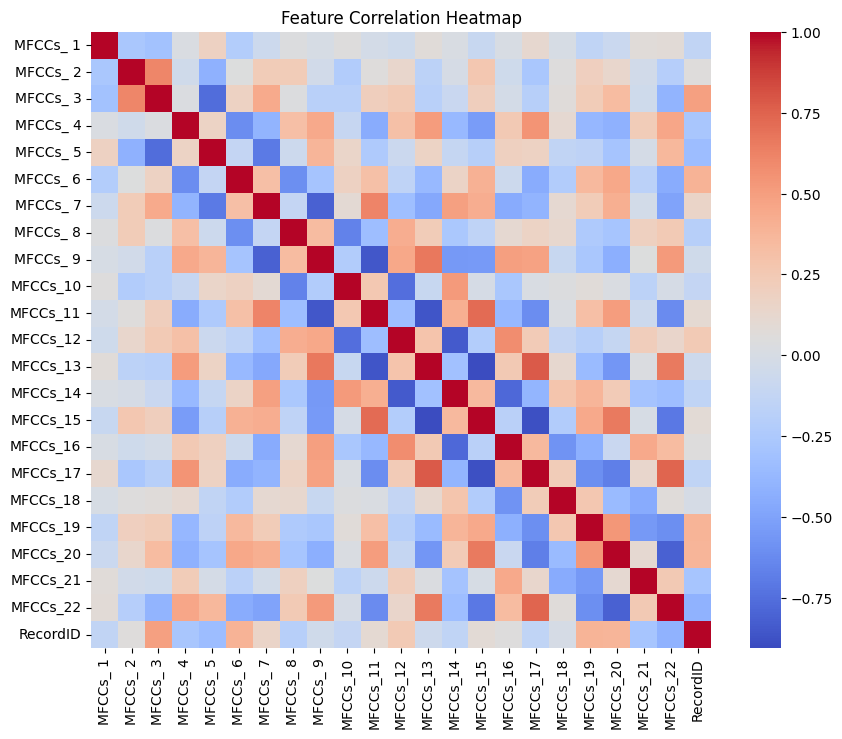

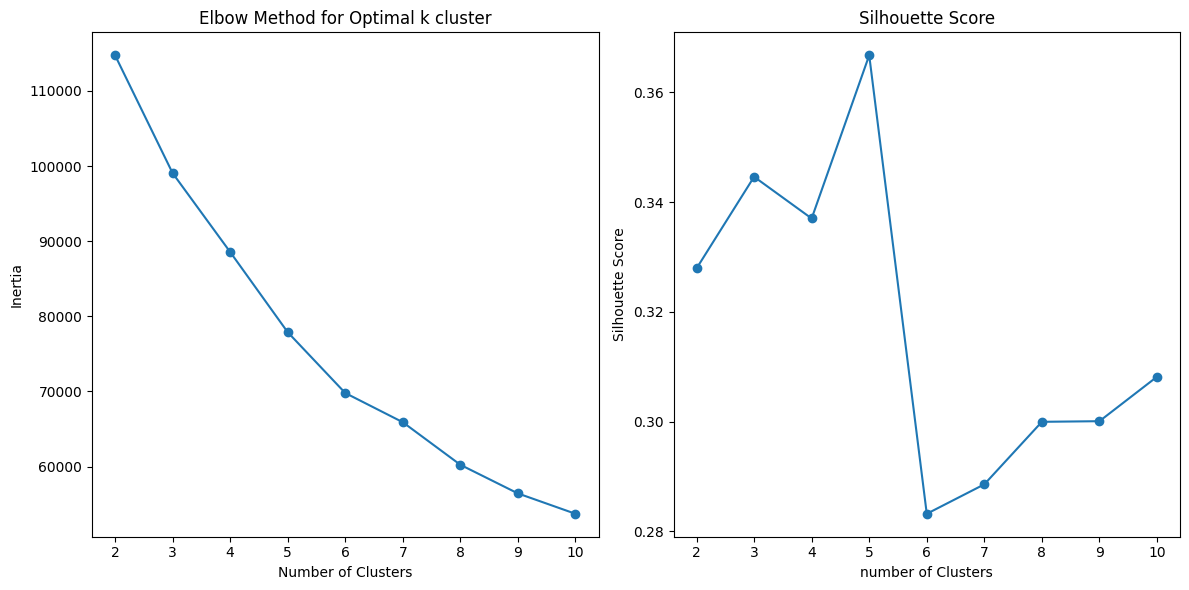

Optimal number of clusters (based on silhouette score): 5
Inertia with Random Initialization: 78379.78039177961
Inertia with K-Means++ Initialization: 77888.05858972874


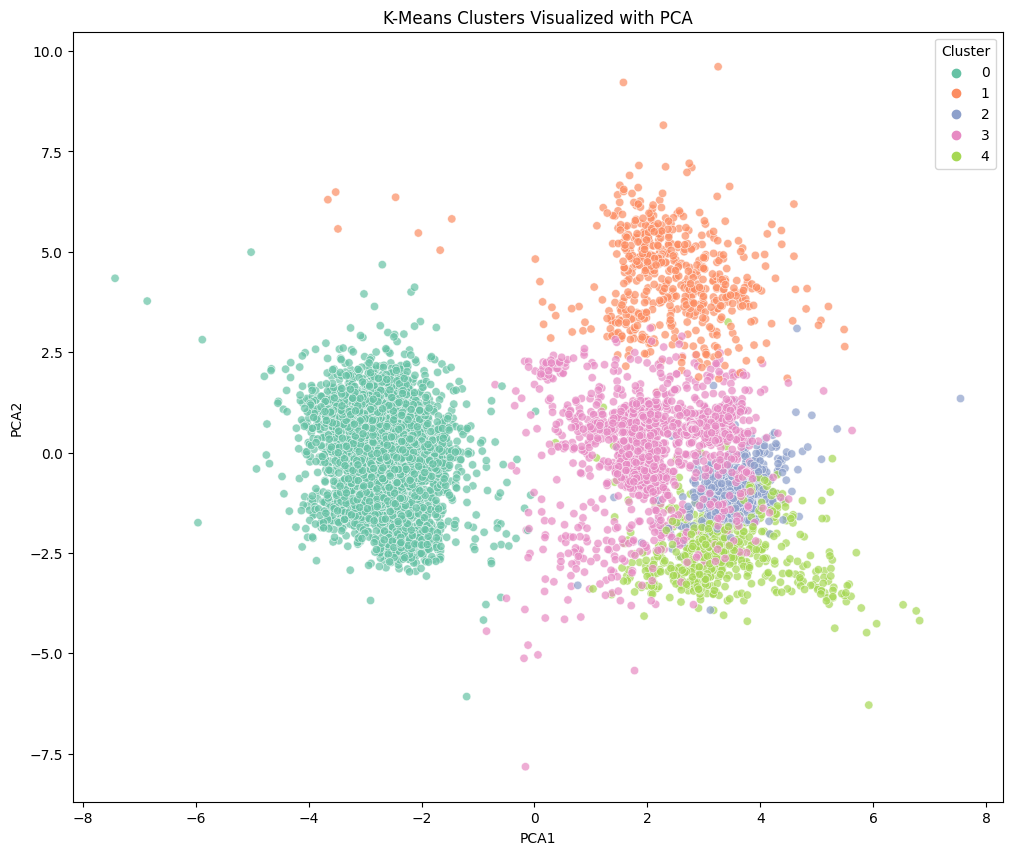

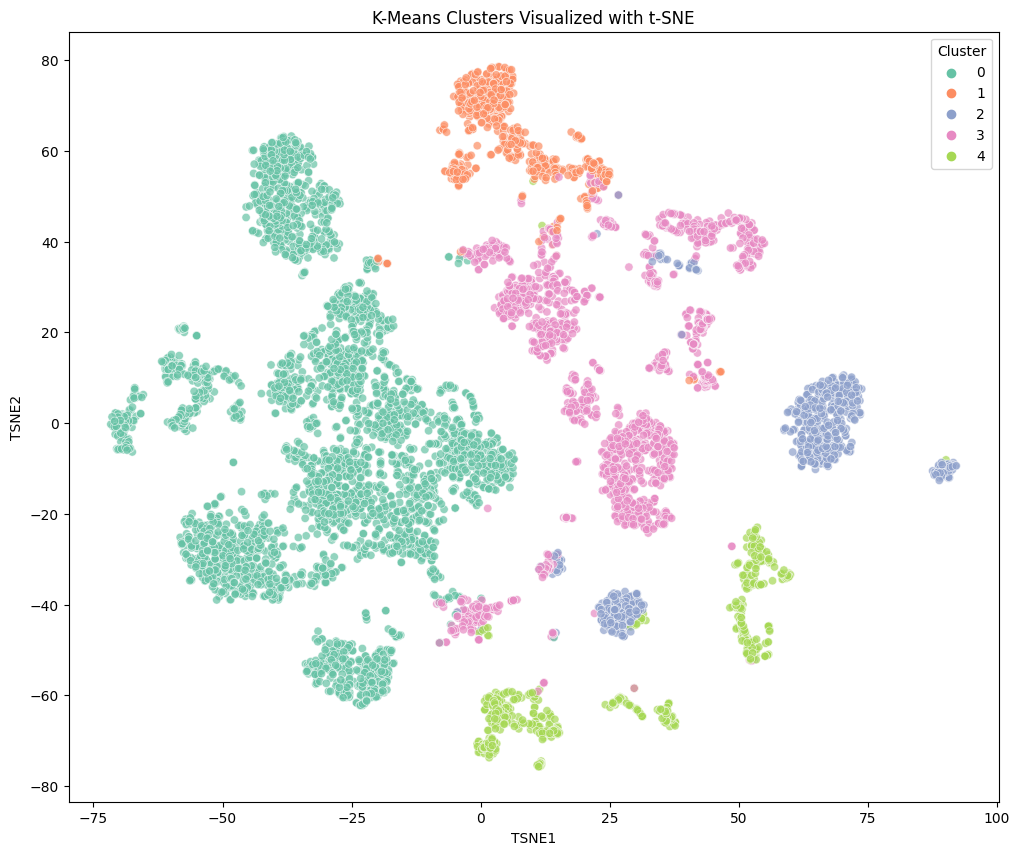

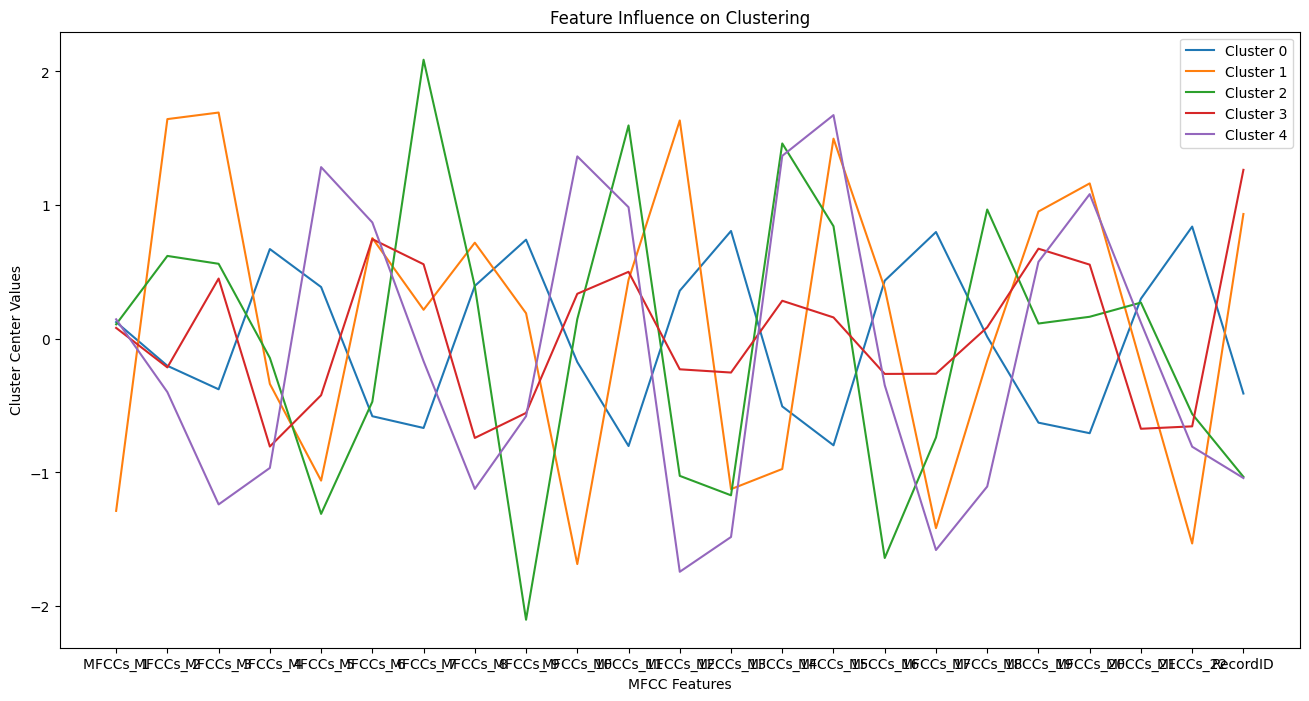

Calinski-Harabasz Index calculation: 2021.5615209303267
Davies-Bouldin Index calculation: 1.3135769248956408


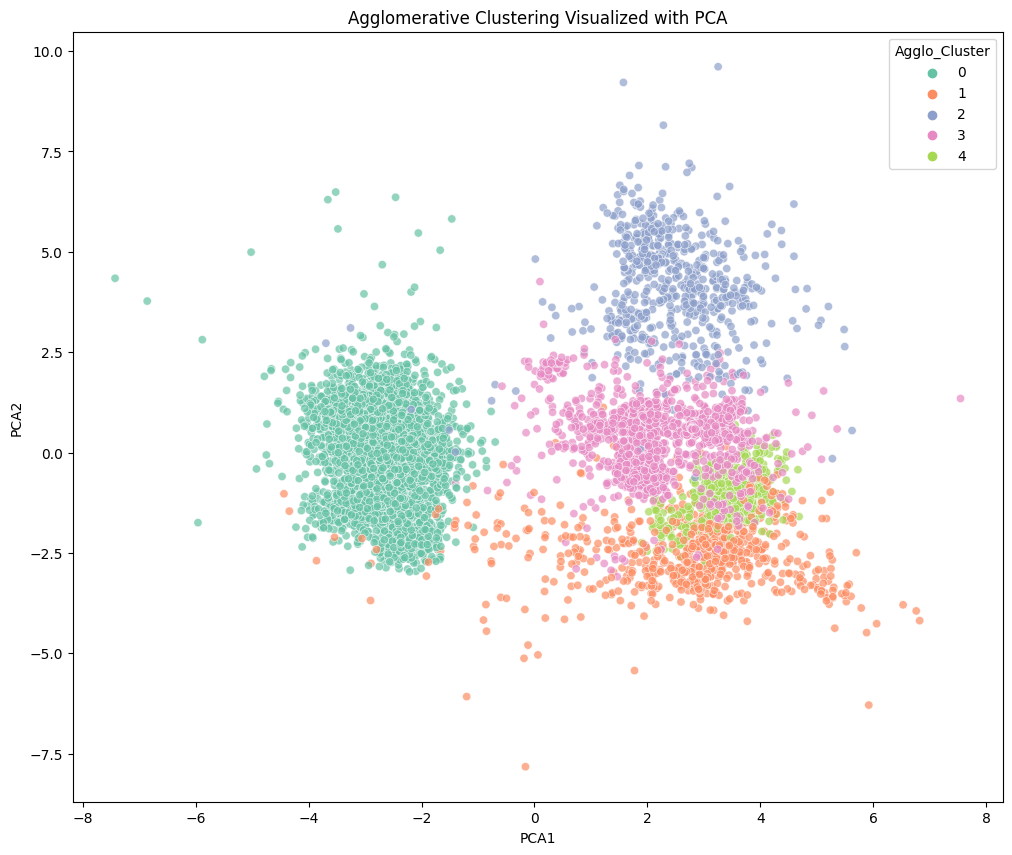

Best Optimal total number of clusters in K-Means : 5
Clustering analysis and evaluation metrics completed. Refer to visualizations for more insights.


In [21]:
# Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

# Load the dataset 
data_path = '/kaggle/input/anuran-calls-mfccs/Frogs_MFCCs.csv'
dataset = pd.read_csv(filepath_or_buffer=data_path)

# Step 1: Data Exploration and Preprocessing
# Checking for missing data and summarizing statistics
missing_values_summary = dataset.isnull().sum()
print(f"Missing Values per Column:\n{missing_values_summary}")
print("\nStatistical Summary of the Dataset:\n", dataset.describe())

# Separating the numeric and categorical columns
numerical_features = dataset.select_dtypes(include=[np.float64, np.int64]).columns.tolist()
categorical_features = dataset.select_dtypes(exclude=[np.number]).columns.tolist()

# Impute any missing values (if present) in numeric columns
imputation_method = SimpleImputer(strategy='mean')
processed_data = dataset.copy()
processed_data[numerical_features] = imputation_method.fit_transform(dataset[numerical_features])

# Standardization of numerical features
scaling_method = StandardScaler()
processed_data[numerical_features] = scaling_method.fit_transform(processed_data[numerical_features])

# Optionally visualize correlations using heatmap
correlation_matrix = processed_data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()










# Step 2: K-Means Clustering and Optimal k Determination
silhouette_scores = []
inertia_values = []
# Testing a range of cluster values
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans_instance = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans_instance.fit(processed_data[numerical_features])
    silhouette_scores.append(silhouette_score(processed_data[numerical_features], kmeans_instance.labels_))
    inertia_values.append(kmeans_instance.inertia_)

# Visualizing the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 6))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k cluster')


# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, '-o')
plt.xlabel('number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# Choosing optimal k based on silhouette score
k_opt_cluster = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (based on silhouette score): {k_opt_cluster}")

# Fitting K-Means with optimal number of clusters
kmeans_final = KMeans(n_clusters=k_opt_cluster, random_state=42,n_init=10)
processed_data['Cluster'] = kmeans_final.fit_predict(processed_data[numerical_features])

# Comparing Random Initialization vs. K-Means++ Initialization
random_inertia = []
kmeans_plus_plus_inertia = []

# Testing the two initialization methods for a fixed number of clusters (e.g., optimal k)
for k in [k_opt_cluster]:  # Use the optimal number of clusters
    # Random initialization
    kmeans_random = KMeans(n_clusters=k, init='random', random_state=42,n_init=10)
    kmeans_random.fit(processed_data[numerical_features])
    random_inertia.append(kmeans_random.inertia_)

    # K-Means++ initialization
    kmeans_plus_plus = KMeans(n_clusters=k, init='k-means++', random_state=42,n_init=10)
    kmeans_plus_plus.fit(processed_data[numerical_features])
    kmeans_plus_plus_inertia.append(kmeans_plus_plus.inertia_)

# Print results
print(f"Inertia with Random Initialization: {random_inertia[0]}")
print(f"Inertia with K-Means++ Initialization: {kmeans_plus_plus_inertia[0]}")










# Step 3: Visualizing Clusters with PCA and t-SNE
# Reducing dimensionality for visualization using PCA
pca_model = PCA(n_components=2)
pca_components = pca_model.fit_transform(processed_data[numerical_features])
processed_data['PCA1'], processed_data['PCA2'] = pca_components[:, 0], pca_components[:, 1]

# PCA-based cluster visualization
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=processed_data, palette='Set2', alpha=0.7)
plt.title('K-Means Clusters Visualized with PCA')
plt.show()

# Additional t-SNE visualization
tsne_model = TSNE(n_components=2, random_state=42)
tsne_components = tsne_model.fit_transform(processed_data[numerical_features])
processed_data['TSNE1'], processed_data['TSNE2'] = tsne_components[:, 0], tsne_components[:, 1]

plt.figure(figsize=(12, 10))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=processed_data, palette='Set2', alpha=0.7)
plt.title('K-Means Clusters Visualized with t-SNE')
plt.show()











# Step 4: Analyzing Feature Importance in Clustering
cluster_means = kmeans_final.cluster_centers_
cluster_df = pd.DataFrame(cluster_means, columns=numerical_features)

plt.figure(figsize=(16, 8))
for cluster_index in range(k_opt_cluster):
    plt.plot(cluster_df.iloc[cluster_index], label=f'Cluster {cluster_index}')
plt.xlabel('MFCC Features')
plt.ylabel('Cluster Center Values')
plt.title('Feature Influence on Clustering')
plt.legend()
plt.show()











# Step 5: Cluster Evaluation Metrics
calinski_harabasz = calinski_harabasz_score(processed_data[numerical_features], processed_data['Cluster'])
davies_bouldin = davies_bouldin_score(processed_data[numerical_features], processed_data['Cluster'])

print(f"Calinski-Harabasz Index calculation: {calinski_harabasz}")
print(f"Davies-Bouldin Index calculation: {davies_bouldin}")









# Step 6: Agglomerative Clustering as an Alternative
agglo_clustering = AgglomerativeClustering(n_clusters=k_opt_cluster)
processed_data['Agglo_Cluster'] = agglo_clustering.fit_predict(processed_data[numerical_features])

# Visualizing Agglomerative Clustering with PCA
plt.figure(figsize=(12, 10))
plt.title('Agglomerative Clustering Visualized with PCA')
sns.scatterplot(x='PCA1', y='PCA2', hue='Agglo_Cluster', data=processed_data, palette='Set2', alpha=0.7)
plt.show()

# Final Summary of Analysis
print(f"Best Optimal total number of clusters in K-Means : {k_opt_cluster}")
print("Clustering analysis and evaluation metrics completed. Refer to visualizations for more insights.")
